# Python 実践データ分析 100本ノック 第2版

(Python Practical Data Analysis 100 Knocks, 2nd ed.)

### 第3部 実践編②：最適化問題

(Part 3: Practice 2: Optimization Problem)

### 第6章 物流の最適ルートをコンサルティングする10本ノック

 (Chapter 06: 10 knocks for consulting on optimal logistics routes)

In [3]:
# Connect with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
# Move to working folder
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/python-100knock-data-analytics/chap06/')

| No. | File Name | Outline |
|-----------|-----------|-----------|
|  1  | tbl_factory.csv     | Production Plant Data   |
|  2  | tbl_warehouse.csv   | Warehouse Data   |
|  3  | rel_cost.csv        | Transportation costs between warehouse and factory   |
|  4  | tbl_transaction.csv | Parts transported to the plant in 2019   |

One company handles all aspects of a product's lifecycle, from manufacturing to distribution.

Recently, profits have been declining, and the company is seeking ways to reduce costs and improve efficiency in logistics.

First, the company is considering the feasibility of reducing the cost of transporting the parts of a certain product from the warehouse to the production plant.

### knock 51 : Let's read the data on logistics.

In [1]:
import pandas as pd

In [5]:
factories = pd.read_csv("tbl_factory.csv", index_col=0)
factories

FCName  FCDemand FCRegion
FCID                             
FC00001   東京工場        28       関東
FC00002  木更津工場        29       関東
FC00003   多摩工場        31       関東
FC00004  横須賀工場        25       関東
FC00005   仙台工場        21       東北
FC00006   山形工場        30       東北
FC00007   那須工場        25       東北
FC00008   青森工場        16       東北

In [6]:
warehouses = pd.read_csv("tbl_warehouse.csv", index_col=0)
warehouses

WHName  WHSupply WHRegion
WHID                             
WH00001   杉並倉庫        35       関東
WH00002   品川倉庫        41       関東
WH00003   豊洲倉庫        42       関東
WH00004   郡山倉庫        60       東北
WH00005   仙台倉庫        72       東北
WH00006   山形倉庫        65       東北

In [8]:
cost = pd.read_csv("rel_cost.csv", index_col=0)
cost.head()

FCID     WHID  Cost
RCostID                        
1        FC00001  WH00001   0.4
2        FC00001  WH00002   0.8
3        FC00001  WH00003   1.5
4        FC00002  WH00001   0.9
5        FC00002  WH00002   0.8

In [9]:
trans = pd.read_csv("tbl_transaction.csv", index_col=0)
trans.head()

TransactionDate     ToFC   FromWH  Quantity
TRID                                                 
0     2019-01-01 02:11:10  FC00004  WH00003        33
1     2019-01-01 06:12:42  FC00007  WH00006        19
2     2019-01-01 06:32:32  FC00006  WH00004        31
3     2019-01-01 07:17:06  FC00002  WH00003        18
4     2019-01-01 07:52:18  FC00001  WH00002        30

In [10]:
# Join each table to the transaction table
# Assign cost data
join_data = pd.merge(trans, cost, left_on=["ToFC","FromWH"], right_on=["FCID","WHID"], how="left")
join_data.head()

TransactionDate     ToFC   FromWH  Quantity     FCID     WHID  Cost
0  2019-01-01 02:11:10  FC00004  WH00003        33  FC00004  WH00003   1.1
1  2019-01-01 06:12:42  FC00007  WH00006        19  FC00007  WH00006   1.3
2  2019-01-01 06:32:32  FC00006  WH00004        31  FC00006  WH00004   0.9
3  2019-01-01 07:17:06  FC00002  WH00003        18  FC00002  WH00003   1.6
4  2019-01-01 07:52:18  FC00001  WH00002        30  FC00001  WH00002   0.8

In [11]:
# Assign factory information
join_data = pd.merge(join_data, factories, left_on="ToFC", right_on="FCID", how="left")
join_data.head()

TransactionDate     ToFC   FromWH  Quantity     FCID     WHID  Cost  \
0  2019-01-01 02:11:10  FC00004  WH00003        33  FC00004  WH00003   1.1   
1  2019-01-01 06:12:42  FC00007  WH00006        19  FC00007  WH00006   1.3   
2  2019-01-01 06:32:32  FC00006  WH00004        31  FC00006  WH00004   0.9   
3  2019-01-01 07:17:06  FC00002  WH00003        18  FC00002  WH00003   1.6   
4  2019-01-01 07:52:18  FC00001  WH00002        30  FC00001  WH00002   0.8   

  FCName  FCDemand FCRegion  
0  横須賀工場        25       関東  
1   那須工場        25       東北  
2   山形工場        30       東北  
3  木更津工場        29       関東  
4   東京工場        28       関東

In [12]:
# Warehouse information is given
join_data = pd.merge(join_data, warehouses, left_on="FromWH", right_on="WHID", how="left")
# Reorder columns
join_data = join_data[["TransactionDate","Quantity","Cost","ToFC","FCName","FCDemand","FromWH","WHName","WHSupply","WHRegion"]]
join_data.head()

TransactionDate  Quantity  Cost     ToFC FCName  FCDemand   FromWH  \
0  2019-01-01 02:11:10        33   1.1  FC00004  横須賀工場        25  WH00003   
1  2019-01-01 06:12:42        19   1.3  FC00007   那須工場        25  WH00006   
2  2019-01-01 06:32:32        31   0.9  FC00006   山形工場        30  WH00004   
3  2019-01-01 07:17:06        18   1.6  FC00002  木更津工場        29  WH00003   
4  2019-01-01 07:52:18        30   0.8  FC00001   東京工場        28  WH00002   

  WHName  WHSupply WHRegion  
0   豊洲倉庫        42       関東  
1   山形倉庫        65       東北  
2   郡山倉庫        60       東北  
3   豊洲倉庫        42       関東  
4   品川倉庫        41       関東

In [13]:
# Extract Kanto Data
kanto = join_data.loc[join_data["WHRegion"]=="関東"]
kanto.head()

TransactionDate  Quantity  Cost     ToFC FCName  FCDemand   FromWH  \
0  2019-01-01 02:11:10        33   1.1  FC00004  横須賀工場        25  WH00003   
3  2019-01-01 07:17:06        18   1.6  FC00002  木更津工場        29  WH00003   
4  2019-01-01 07:52:18        30   0.8  FC00001   東京工場        28  WH00002   
7  2019-01-01 09:09:30        12   1.5  FC00001   東京工場        28  WH00003   
8  2019-01-01 10:52:55        27   1.5  FC00003   多摩工場        31  WH00003   

  WHName  WHSupply WHRegion  
0   豊洲倉庫        42       関東  
3   豊洲倉庫        42       関東  
4   品川倉庫        41       関東  
7   豊洲倉庫        42       関東  
8   豊洲倉庫        42       関東

In [14]:
# Extract Tohoku Data
tohoku = join_data.loc[join_data["WHRegion"]=="東北"]
tohoku.head()

TransactionDate  Quantity  Cost     ToFC FCName  FCDemand   FromWH  \
1  2019-01-01 06:12:42        19   1.3  FC00007   那須工場        25  WH00006   
2  2019-01-01 06:32:32        31   0.9  FC00006   山形工場        30  WH00004   
5  2019-01-01 08:56:09        31   0.3  FC00005   仙台工場        21  WH00005   
6  2019-01-01 09:00:15        33   0.7  FC00006   山形工場        30  WH00006   
9  2019-01-01 14:12:51        21   0.7  FC00006   山形工場        30  WH00006   

  WHName  WHSupply WHRegion  
1   山形倉庫        65       東北  
2   郡山倉庫        60       東北  
5   仙台倉庫        72       東北  
6   山形倉庫        65       東北  
9   山形倉庫        65       東北

### knock 52 : Let's check the current transportation volume and cost.

In [58]:
# Calculate total costs for branch offices
print("Total cost of Kanto Branch: " + str(kanto["Cost"].sum()) + " man yen")
print("Total cost of Tohoku Branch: " + str(tohoku["Cost"].sum()) + " man yen")

Total cost of Kanto Branch: 2189.3 man yen
Total cost of Tohoku Branch: 2062.0 man yen


In [18]:
# Total number of units transported by branch offices
print("Total number of parts transported by Kanto Branch: " + str(kanto["Quantity"].sum()) )
print("Total number of parts transported by Tohoku Branch: " + str(tohoku["Quantity"].sum()) )

Total number of parts transported by Kanto Branch: 49146
Total number of parts transported by Tohoku Branch: 50214


In [54]:
# Transportation cost per component
tmp = (kanto["Cost"].sum() / kanto["Quantity"].sum()) * 10000
print("Transportation cost per part for Kanto Branch: " + str(int(tmp)) + " yen")
tmp = (tohoku["Cost"].sum() / tohoku["Quantity"].sum()) * 10000
print("Transportation cost per part for Tohoku Branch: " + str(int(tmp)) + " yen")

Transportation cost per part for Kanto Branch: 445 yen
Transportation cost per part for Tohoku Branch: 410 yen


In [55]:
# Aggregate cost tables by branch office
cost_chk = pd.merge(cost, factories, on="FCID", how="left")
# average
print("Average Transportation Cost for Kanto Branch：" + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="関東"].mean()) + " man yen")
print("Average Transportation Cost for Tohoku Branch：" + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="東北"].mean()) + " man yen")

Average Transportation Cost for Kanto Branch：1.075 man yen
Average Transportation Cost for Tohoku Branch：1.05 man yen


### knock 53 : Let's visualize the network.

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

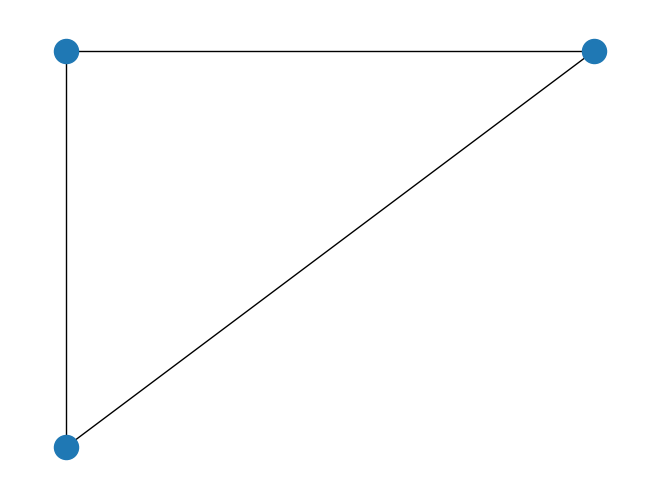

In [23]:
# Creating Graph Objects
G=nx.Graph()

# Vertex Settings
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

# Edge setting
G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeB","nodeC")

# Coordinate setting
pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)

# drawing
nx.draw(G,pos)

# display
plt.show()

### knock 54 : Let's add a node to the network.

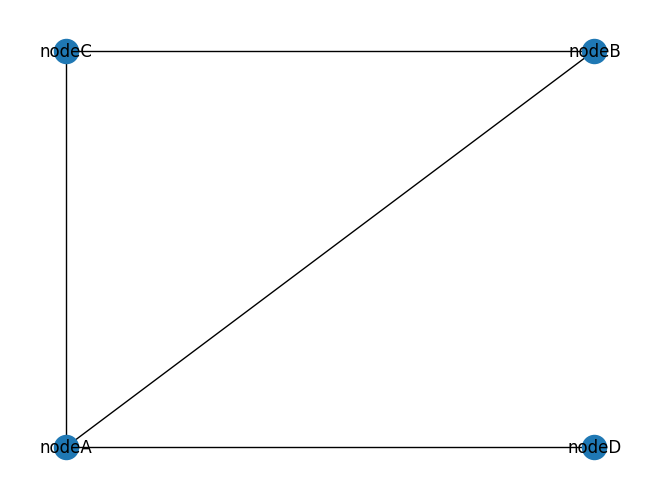

In [24]:
# Creating Graph Objects
G=nx.Graph()

# Vertex Settings
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")
G.add_node("nodeD")

# Edge setting
G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeB","nodeC")
G.add_edge("nodeA","nodeD")

# Coordinate setting
pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)
pos["nodeD"]=(1,0)

nx.draw(G,pos, with_labels=True)

plt.show()

### knock 55 : Let's implement route weighting.

In [25]:
import numpy as np

<ipython-input-31-bbf31d61b034>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  edge_weights.append(df_w.iloc[i][j]*size)


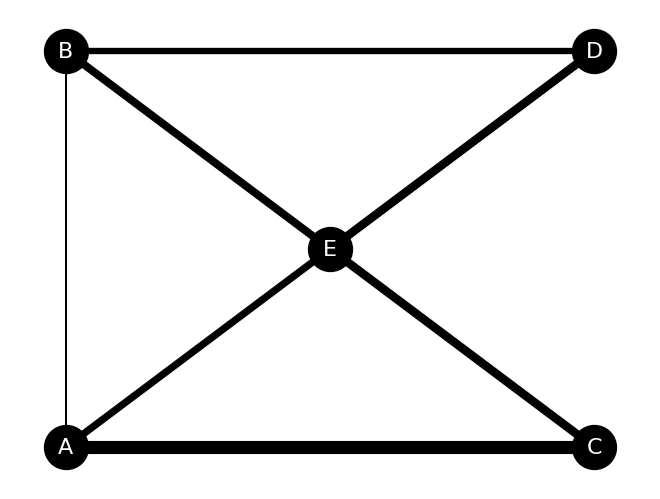

In [31]:
df_w = pd.read_csv('network_weight.csv')
df_p = pd.read_csv('network_pos.csv')

# Creating Graph Objects
G = nx.Graph()

# Vertex Settings
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])

# Set edges & list edge weights
size = 10
edge_weights = []
num_pre = 0
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        if not (i==j):
            # Adding Edges
            G.add_edge(df_w.columns[i],df_w.columns[j])
            if num_pre<len(G.edges):
              num_pre = len(G.edges)
              # Adding Edge Weights
              edge_weights.append(df_w.iloc[i][j]*size)

# Coordinate setting
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0],df_p[node][1])

nx.draw(G, pos, with_labels=True,font_size=16, node_size = 1000, node_color='k', font_color='w', width=edge_weights)

plt.show()

### knock 56 : Let's read the transport route information.

| No. | File Name | Outline |
|-----------|-----------|-----------|
|  1  | trans_route.csv     | transportation route   |
|  2  | trans_route_pos.csv | Warehouse and factory location information   |
|  3  | trans_cost.csv      | Transportation costs between warehouse and factory   |
|  4  | demand.csv          | Demand for the factory's product output  |
|  5  | supply.csv          | Maximum number of parts the warehouse can supply   |
|  6  | trans_route_new.csv | Newly redesigned transport routes   |

In [47]:
df_tr = pd.read_csv('trans_route.csv', index_col="工場")
df_tr.head()

F1  F2  F3  F4
工場                
W1  15  15   0   5
W2   5   0  30   5
W3  10  15   2  15

### knock 57 : Let's visualize the network from transport route information.

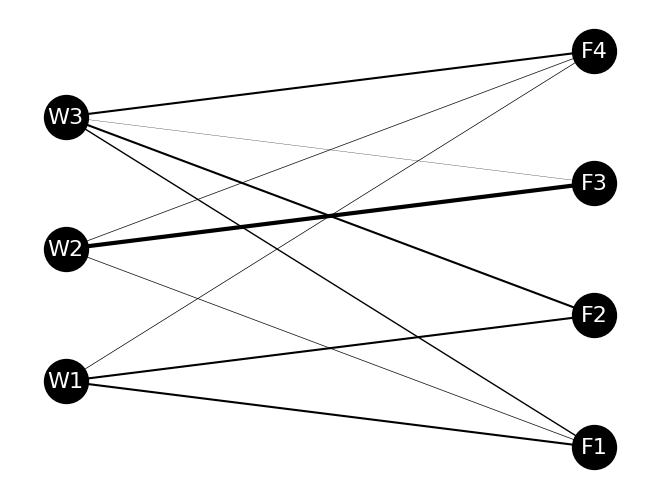

In [48]:
df_tr = pd.read_csv('trans_route.csv', index_col="工場")
df_pos = pd.read_csv('trans_route_pos.csv')


# Creating Graph Objects
G = nx.Graph()

# Vertex Settings
for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

# Set edges & list edge weights
num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j):
            # Adding Edges
            G.add_edge(df_pos.columns[i],df_pos.columns[j])
            # Adding Edge Weights
            if num_pre<len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                if (df_pos.columns[i] in df_tr.columns)and(df_pos.columns[j] in df_tr.index):
                    if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                        weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
                elif(df_pos.columns[j] in df_tr.columns)and(df_pos.columns[i] in df_tr.index):
                    if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
                        weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
                edge_weights.append(weight)


# Coordinate setting
pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0],df_pos[node][1])

nx.draw(G, pos, with_labels=True,font_size=16, node_size = 1000, node_color='k', font_color='w', width=edge_weights)

plt.show()

### knock 58 : Let's create a transportation cost function.

In [52]:
df_tr = pd.read_csv('trans_route.csv', index_col="工場")
df_tc = pd.read_csv('trans_cost.csv', index_col="工場")

# Transport cost function
def trans_cost(df_tr,df_tc):
    cost = 0
    for i in range(len(df_tc.index)):
        for j in range(len(df_tr.columns)):
            cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]
    return cost

print("Total Transportation Cost:"+str(trans_cost(df_tr,df_tc)) + " man yen")

Total Transportation Cost:1493 man yen


<ipython-input-52-8904d21eb61a>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]


### knock 59 : Let's create constraints.

In [63]:
df_tr = pd.read_csv('trans_route.csv', index_col="工場")
df_demand = pd.read_csv('demand.csv')
df_supply = pd.read_csv('supply.csv')

# demand-side constraints
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    print("Volume transported to "+ str(df_demand.columns[i])+ ": " +str(temp_sum)+" (demand volume:"+str(df_demand.iloc[0][i])+")")
    if temp_sum>=df_demand.iloc[0][i]:
        print("The quantity demanded is met.")
    else:
        print("Demand is not met. Please recalculate the transportation route.")

# Supply-side constraints
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    print("Volume transported from "+ str(df_supply.columns[i]) + ": "+ str(temp_sum)+" (supply limit:"+str(df_supply.iloc[0][i])+")")
    if temp_sum<=df_supply.iloc[0][i]:
        print("It is within supply limits.")
    else:
        print("Supply limits have been exceeded. Please recalculate the transportation route.")

Volume transported to F1: 30 (demand volume:28)
The quantity demanded is met.
Volume transported to F2: 30 (demand volume:29)
The quantity demanded is met.
Volume transported to F3: 32 (demand volume:31)
The quantity demanded is met.
Volume transported to F4: 25 (demand volume:25)
The quantity demanded is met.
Volume transported from W1: 35 (supply limit:35)
It is within supply limits.
Volume transported from W2: 40 (supply limit:41)
It is within supply limits.
Volume transported from W3: 42 (supply limit:42)
It is within supply limits.


<ipython-input-63-80d5d639c175>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Volume transported to "+ str(df_demand.columns[i])+ ": " +str(temp_sum)+" (demand volume:"+str(df_demand.iloc[0][i])+")")
<ipython-input-63-80d5d639c175>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if temp_sum>=df_demand.iloc[0][i]:
<ipython-input-63-80d5d639c175>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Volume transported fr

### knock 60 : Let's change the transportation route and see how the transportation cost function changes!

In [64]:
df_tr_new = pd.read_csv('trans_route_new.csv', index_col="工場")
print(df_tr_new)

# Recalculation of total transportation costs
print("Total transportation cost (after change):"+str(trans_cost(df_tr_new,df_tc)))

# Constraint Calculation Functions
# demand side
def condition_demand(df_tr,df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum>=df_demand.iloc[0][i]):
            flag[i] = 1
    return flag

# supply side
def condition_supply(df_tr,df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if temp_sum<=df_supply.iloc[0][i]:
            flag[i] = 1
    return flag

print("Demand Condition Calculation Result:"+str(condition_demand(df_tr_new,df_demand)))
print("Supply Condition Calculation Result:"+str(condition_supply(df_tr_new,df_supply)))

    F1  F2  F3  F4
工場                
W1  15  15   0   0
W2   5   0  30  10
W3  10  15   2  15
Total transportation cost (after change):1428
Demand Condition Calculation Result:[1. 1. 1. 1.]
Supply Condition Calculation Result:[1. 0. 1.]


<ipython-input-52-8904d21eb61a>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]
<ipython-input-64-5c9347590174>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (temp_sum>=df_demand.iloc[0][i]):
<ipython-input-64-5c9347590174>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if temp_sum<=df_supply.iloc[0][i]:


The route read in this case is to reduce the transportation from factory W1 to F4 and to compensate for this by transportation from factory W2 to F4.

The cost of transportation is 14.28 million yen, which is slightly less than the original transportation cost of 14.33 million yen.

However, the second supply condition is not met, and it is clear that the supply limit from factory W2 has been exceeded.

It seems that it will not be easy to reduce costs while satisfying all the constraints.